**Standard Form**

$$ (Min)Max \ z = c^{t}x \\ Ax \leq b \\ x \geq 0 $$

n = number of variables in the std form

m = number of constraints, excluding non-negativity consts 

> **Note**: each corner point has n-m zero variables.

**corner point**: a feasible solution that has (at least) n-m zero variables, aka Basic Feasible Solution (BFS)

> The m **non-zero** variables are called **basic variables**

In [1]:
import math
from scipy.spatial import HalfspaceIntersection, ConvexHull
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
from simplex_functions import *

**Example**

Below we solve the following linear program:

Objective function: $$ Max \ z = 3x + 5y $$
Constraints: $$  x + 2y \leq 6 \\ 2x + 3y \leq 10 \\ x + y \leq 5 \\ x \leq 4 \\ y \leq 3 \\ x, y \geq 0 $$

In [2]:
c = [3, 5, 0, 0, 0]
A = [
    [1, 2, 1, 0, 0],
    [2, 3, 0, 1, 0],
    [1, 0, 0, 0, 1]
]
b = [6, 10, 4]

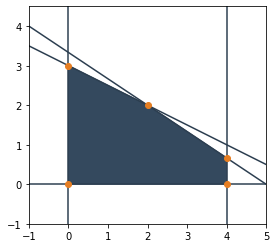

In [3]:
halfspaces = [
    [-1, 0, 0],    # x₁ ≥ 0
    [0, -1, 0],    # x₂ ≥ 0
    [1, 2, -6],    # x₁ + 2x₂ ≤ 6
    [2, 3, -10],    # 2x₁ + 3x₂ ≤ 10
    [1, 0, -4],    # x₁ ≤ 4
]
feasible_point = np.array([0.01, 0.01])
xlim = (-1, 5)
ylim = (-1, 4.5)
render_inequalities(halfspaces, feasible_point, xlim, ylim)
plt.show()

In [4]:
solution = simplex(c, A, b)
print('solution: ', solution)

solution:  [1.9999999999999991, 2.0000000000000004, 0, 0, 2.000000000000001]


Iterations:  [[0, 0, 6, 10, 4], [4.0, 0, 2.0, 2.0, 0], [4.0, 0.6666666666666666, 0.6666666666666667, 0, 0], [1.9999999999999991, 2.0000000000000004, 0, 0, 2.000000000000001]]


[1.9999999999999991, 2.0000000000000004, 0, 0, 2.000000000000001]

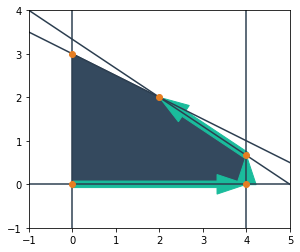

In [5]:
simplex_with_visualization(c, A, b, halfspaces, feasible_point)

**Example**

Below we solve the following linear program:

Objective function: $$ Max \ z = 3x + 2y $$
Constraints: $$  2x + y \leq 18 \\ 2x + 3y \leq 42 \\ 3x + y \leq 24 \\ x, y \geq 0 $$

In [6]:
c = [3, 2, 0, 0, 0]
A = [
    [2, 1, 1, 0, 0],
    [2, 3, 0, 1, 0],
    [3, 1, 0, 0, 1]
]
b = [18, 42, 24]

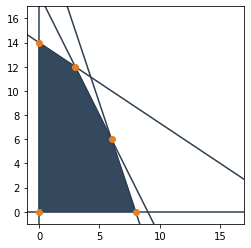

In [7]:
halfspaces = [
    [-1, 0, 0],    # x₁ ≥ 0
    [0, -1, 0],    # x₂ ≥ 0
    [2, 1, -18],    # 2𝑥+𝑦≤18
    [2, 3, -42],    # 2𝑥+3𝑦≤42
    [3, 1, -24],    # 3𝑥+𝑦≤24
]
feasible_point = np.array([0.01, 0.01])
xlim = (-1, 17)
ylim = (-1, 17)
render_inequalities(halfspaces, feasible_point, xlim, ylim)
plt.show()

In [8]:
solution = simplex(c, A, b)
print('solution: ', solution)

solution:  [3.0, 12.0, 0, 0, 3.000000000000001]


Iterations:  [[0, 0, 18, 42, 24], [8.0, 0, 2.0, 26.0, 0], [6.0, 5.999999999999999, 0, 12.000000000000002, 0], [3.0, 12.0, 0, 0, 3.000000000000001]]


[3.0, 12.0, 0, 0, 3.000000000000001]

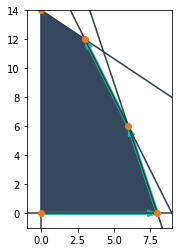

In [9]:
simplex_with_visualization(c, A, b, halfspaces, feasible_point)

**Homework Problem**

$$ Max \ z = 2x_{1} - x_{2} + 2x_{3} \ s.t. \ \\ x_{1} - x_{2} + 2x_{3} \leq 20 \\ x_{1} + x_{2} - 2x_{3} \leq 40 \\ x_{1}, x_{2}, x_{3} \geq 0 $$